## PowerPulse: Household Energy Usage Forecast

### The project helps to analyze the energy consumption, cost reduction and optimization of resources and predict household energy consumption based on historical data 

#### **Step - 1** - *Import the Important Libraries*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

#### **Step - 2** - *Read the Data from dataset*
##### The data in the txt file format with ";" delimiter, used the read csv with delimiter breakup to read the records 

In [9]:
#Read the data
df = pd.read_csv('D:\Data Science\data\household_power_consumption.txt',delimiter=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


#### **Step -3** - *Getting an idea about the null values*

In [5]:
df.isnull().sum().any()

True

##### We received the result as "True", True means there is null value in the dataset

#### **Step -4** - *Verify the null value records from the Dataframe*

In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

##### As per output we are having the null values in the "Sub_metering_3" field, to understand the null values records will explore more detail

In [9]:
df_null = df[df['Sub_metering_3'].isnull()]
df_null.head(100)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
190583,28/4/2007,01:47:00,?,?,?,?,?,?,NaN
190584,28/4/2007,01:48:00,?,?,?,?,?,?,NaN
190585,28/4/2007,01:49:00,?,?,?,?,?,?,NaN
190586,28/4/2007,01:50:00,?,?,?,?,?,?,NaN


##### The null value records of "Sub_metering_3" field related other values with "?" mark symbol, this data not usefull for our analysis, we can remove the null records from our dataframe

#### **Step - 5** - *Remove the null records from the dataframe* 
##### Drop the null values and verify the records

In [11]:
df = df.dropna()
df.isnull().sum().any()

False

##### We received the response as False, False means there is no null values in our record

#### **Step - 6** - *Validate the duplicate values*

In [13]:
df.duplicated().any()

False

##### False means there is no duplicate in our record, if incase the value is True need to apply the "df.drop_duplicates()" to remove the duplicate values 

#### **Step - 7** - *Convert the Date format into Day,Month,year format and Time converted to Hour and minutes format*

In [13]:
df['Datetime'] = pd.to_datetime(df['Date'].str.strip() + ' ' + df['Time'].str.strip(), errors='coerce', dayfirst=True)
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minutes'] = pd.to_datetime(df['Time']).dt.minute

#### **Step - 8** - *Convert the object value to float datatype*

In [14]:
df['Global_active_power'] = df['Global_active_power'].astype(float)
df['Global_reactive_power'] = df['Global_reactive_power'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Global_intensity'] = df['Global_intensity'].astype(float)
df['Sub_metering_1'] = df['Sub_metering_1'].astype(float)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Day                    int32         
 11  Month                  int32         
 12  Year                   int32         
 13  Hour                   int32         
 14  Minutes                int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 211.1+ MB


##### Set the Index for the datetime field 

In [15]:
df.set_index('Datetime', inplace=True)

#### **Step - 9** - *Calculate the daily aveage consumption against Global active power*

In [16]:
# Resample the data Group by based on the Global Active Power 
daily_groups = df['Global_active_power'].resample('D')

#Calculate the mean value from the above series
daily_data = daily_groups.mean()

# We got the data as series and convert the series to data frame 
daily_avg_df = daily_data.to_frame()

#Update the column name
daily_avg_df.columns = ['Daily_avg']

#### Verify the data 

In [29]:
daily_avg_df.head()

,Daily_avg
Datetime,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658


##### Apply the changes in the Plot 

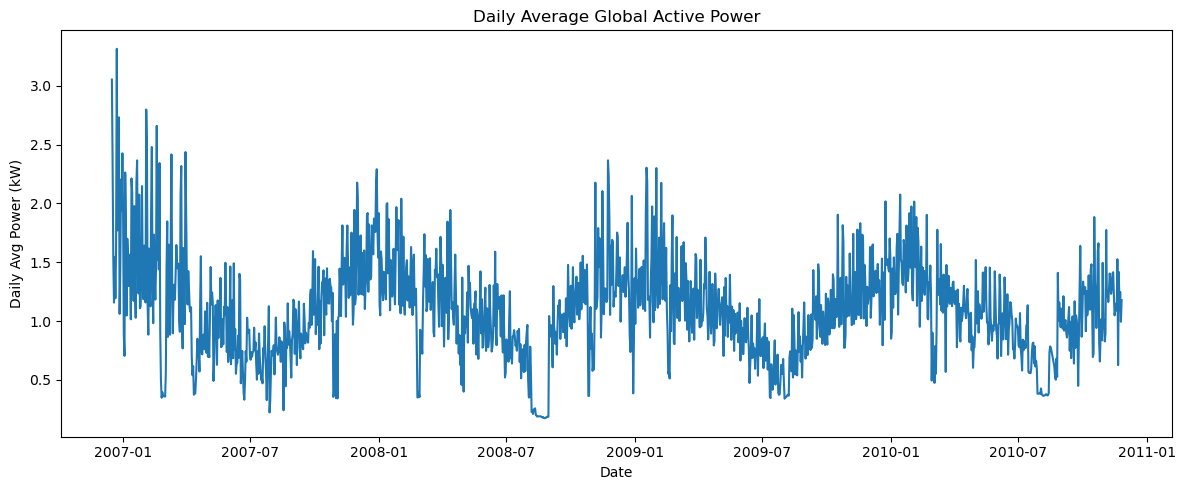

In [32]:
#Define the plot figure size
plt.figure(figsize=(12, 5))
# Draw the line plot based on the value 
sns.lineplot(data=daily_avg_df, x=daily_avg_df.index, y=daily_avg_df['Daily_avg'])
# Define the title and label names
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Daily Avg Power (kW)')
plt.tight_layout()
plt.show()

#### **Step - 10** - *calculate the Rolling Average and peak hours*
##### **Rolling Average** - A technique used to analyze time series data by calculating the average of a specific number of recent data points
##### **Peak Hours** - We are consider From 6 PM to 10 PM as peak hours 

In [17]:
# Define the new field Rolling_avg_power and consider every 3 hours average and maintain in the field 
df['Rolling_avg_power'] = df['Global_active_power'].rolling('3H').mean()

In [18]:
# Define the hour field as index
df['Hour'] = df.index.hour

# Create the new column is_peak_hour and update the flag between 18 to 22 (6PM to 10PM)
df['is_peak_hour'] = df['Hour'].between(18, 22).astype(int)

##### Draw line plot for Rolling aveager power

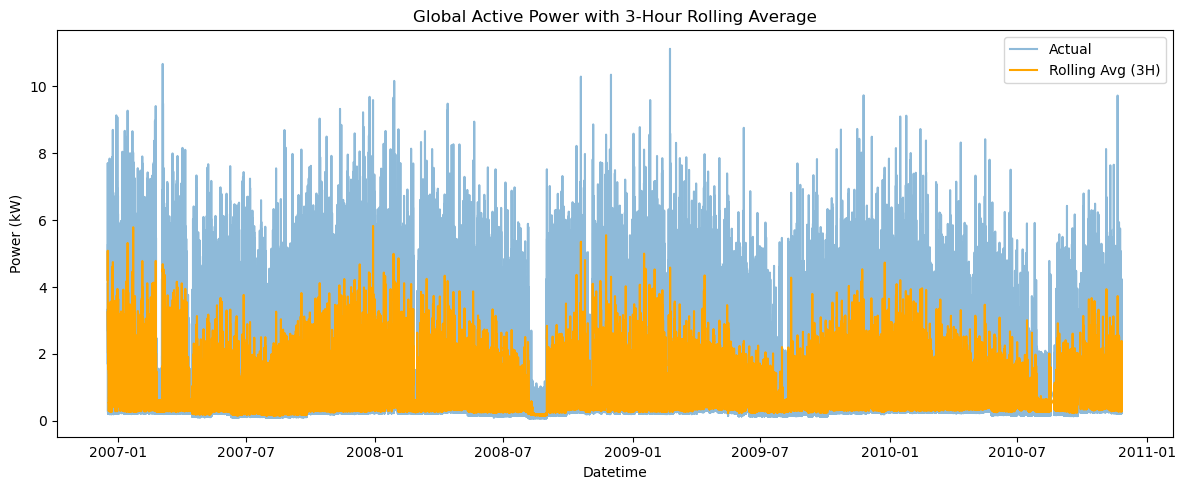

In [40]:
# Define the figure size
plt.figure(figsize=(12, 5))

# Draw the line plot for Global Active power
sns.lineplot(x=df.index, y=df['Global_active_power'], label='Actual', alpha=0.5)
# Draw the line plot for rolling average power
sns.lineplot(x=df.index, y=df['Rolling_avg_power'], label='Rolling Avg (3H)', color='orange')
# Define the label and title
plt.title('Global Active Power with 3-Hour Rolling Average')
plt.xlabel('Datetime')
plt.ylabel('Power (kW)')
plt.legend()
plt.tight_layout()
plt.show()

##### Draw the Box plot to compare the Peak and off-peak hour related inforamtion and outliers of the data

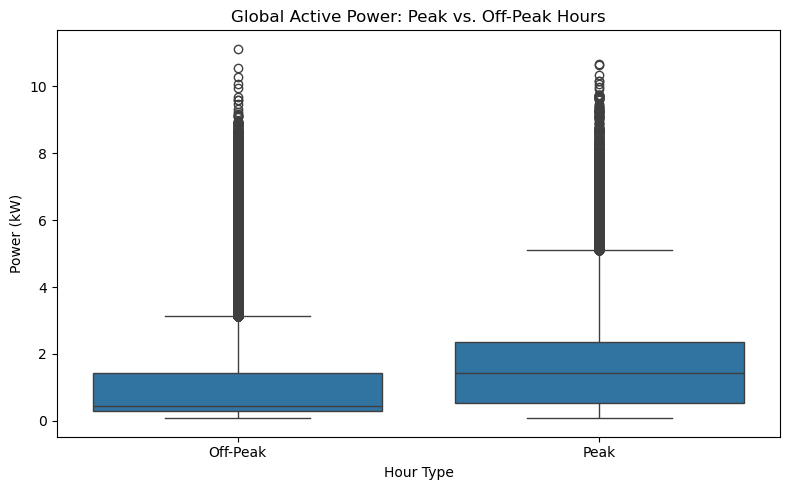

In [42]:
# Define the Figure size
plt.figure(figsize=(8, 5))

#Draw the Box plot
sns.boxplot(x='is_peak_hour', y='Global_active_power', data=df)

#Define the ticks with 0 and 1 based on is_peak_hour field (x values)
plt.xticks([0, 1], ['Off-Peak', 'Peak'])

#Define the title and label
plt.title('Global Active Power: Peak vs. Off-Peak Hours')
plt.xlabel('Hour Type')
plt.ylabel('Power (kW)')
plt.tight_layout()
plt.show()

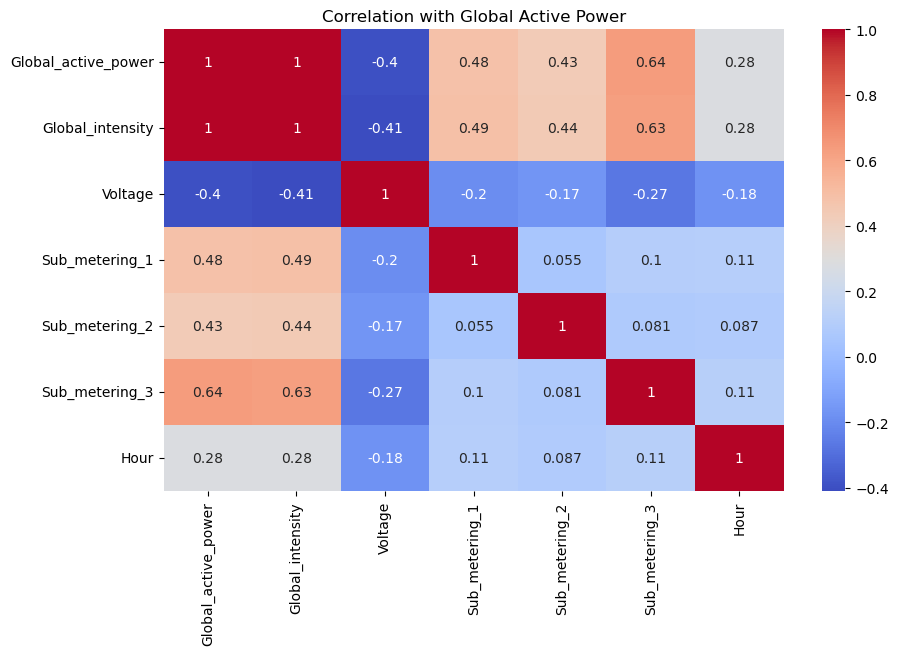

In [19]:
corr = df[['Global_active_power', 'Global_intensity', 'Voltage', 
           'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 
           'Hour']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation with Global Active Power')
plt.show()

In [102]:
#Reverify the data 
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes,Rolling_avg_power,is_peak_hour
Datetime,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17,24,4.216000,0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17,25,4.788000,0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17,26,4.983333,0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17,27,5.084500,0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17,28,4.800800,0


#### **Step - 11** - *Perform the model selection and training*

##### **11.1** - *Split the dataset into training and testing set*

In [19]:
#Separating the input feature and target variable 
X = df[['Day','Month','Year','Hour','Minutes','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = df['Global_active_power']

##### **11.2** - *Perform the Standard Scalling*

In [20]:
# Standard Scaling
scaler  = StandardScaler()
#scaling
X = scaler.fit_transform(X)

##### **11.3** - *Perform the train an testing split*

In [21]:
# Performing train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### **Linear Regression**

##### Initialize the Linear Regression ML Model

In [27]:
#Initialize the ML Model
modellr = LinearRegression()

#Fitting the model
modellr.fit(X_train,y_train)

LinearRegression()

##### Taking the prediction from the Model

In [31]:
# Taking the prediction from the model
y_train_pred = modellr.predict(X_train)
y_test_pred = modellr.predict(X_test)

##### Model Evaluation metrics

In [33]:
# Model evaluating on training data
print('Training RSME : ', np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3))
print('Training MAE : ', np.round(metrics.mean_absolute_error(y_train,y_train_pred),3))
print('Training R2 Score :',np.round(metrics.r2_score(y_train,y_train_pred),3))

# Model evaluation on testing data
print('\nTesting RSME : ', np.round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3))
print('Training MAE : ', np.round(metrics.mean_absolute_error(y_test,y_test_pred),3))
print('Testing R2 Score :',np.round(metrics.r2_score(y_test,y_test_pred),3))

Training RSME :  0.04
Training MAE :  0.026
Training R2 Score : 0.999

Testing RSME :  0.041
Training MAE :  0.026
Testing R2 Score : 0.999


##### From the above evaluation metrics we can see the difference less than 1% and we consider this as a optimal model 

##### **Actual vs Predicted (Scatter Plot) – Test Set**

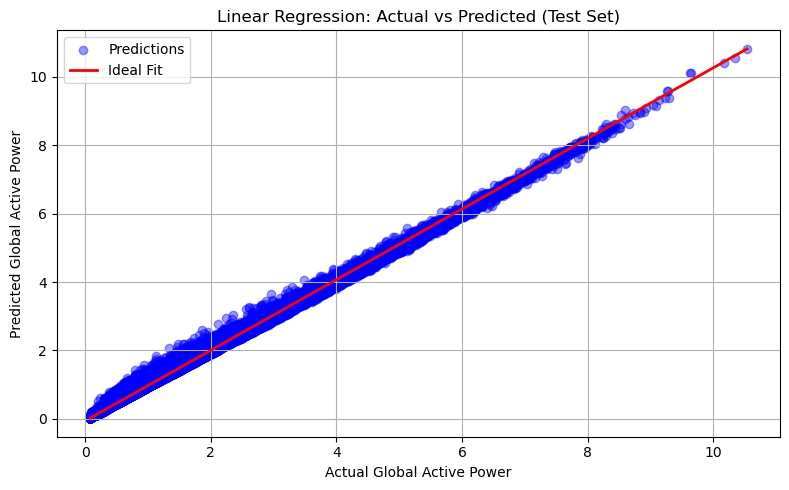

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], color='red', linewidth=2, label="Ideal Fit")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Random Forest**
##### Initialize the Random Forest ML Model

In [37]:
#Creating the model 
modelrf = RandomForestRegressor()

#Fitting the model 
modelrf.fit(X_train,y_train)

RandomForestRegressor()

##### Taking the prediction from the Model

In [41]:
#Taking the prediction from the model
y_train_pred = modelrf.predict(X_train)
y_test_pred = modelrf.predict(X_test)

##### Model Evaluation Metrics

In [47]:
# Model Evaluation 
print('Training RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3))
print('Training MAE : ', np.round(metrics.mean_absolute_error(y_train,y_train_pred),3))
print('Training R2 Score : ',np.round(metrics.r2_score(y_train,y_train_pred),3))

print('\nTesting RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3))
print('Testing MAE : ', np.round(metrics.mean_absolute_error(y_test,y_test_pred),3))
print('Testing R2 Score : ',np.round(metrics.mean_squared_error(y_test,y_test_pred),3))

Training RMSE :  0.009
Training MAE :  0.004
Training R2 Score :  1.0

Testing RMSE :  0.025
Testing MAE :  0.011
Testing R2 Score :  0.001


##### Best on the above value we are having the training and testing data mismatch more than 5%, will do the hyper parameter optimization 

#### RandomsearchCV()
##### Define the Parameter Grid 

In [58]:
# Import the important libraires 
from sklearn.model_selection import RandomizedSearchCV

# Define the Grid values 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

##### Fitting the RandomizedSearchCV with RandomForestRegressor

In [60]:
#Fitting the RandomizedsearchCV
modelrf = RandomForestRegressor(random_state=5)
random_search = RandomizedSearchCV(estimator=modelrf,param_distributions=param_grid,verbose=2)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.3min
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=5),
                   param_distributions={'max_depth': [10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   verbose=2)

##### Collecting the best parameter value from the hyper parameter optimzation

In [62]:
#Getting the best parameter
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}


##### Update the best parameter to optimal the Random forest model

In [67]:
#Creating the Optimal Random Forest Model
#Creating the model 
modelrf = RandomForestRegressor(n_estimators=100,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=20)

#Fitting the model 
modelrf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5)

##### Taking the Prediction from the optimzed model

In [69]:
#Taking the prediction from the model
y_train_pred = modelrf.predict(X_train)
y_test_pred = modelrf.predict(X_test)

##### Model evalation from the optimzed model

In [71]:
# Model Evaluation 
print('Training RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3))
print('Training MAE : ', np.round(metrics.mean_absolute_error(y_train,y_train_pred),3))
print('Training R2 Score : ',np.round(metrics.r2_score(y_train,y_train_pred),3))

print('\nTesting RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3))
print('Testing MAE : ', np.round(metrics.mean_absolute_error(y_test,y_test_pred),3))
print('Testing R2 Score : ',np.round(metrics.mean_squared_error(y_test,y_test_pred),3))

Training RMSE :  0.025
Training MAE :  0.014
Training R2 Score :  0.999

Testing RMSE :  0.033
Testing MAE :  0.017
Testing R2 Score :  0.001


##### From the above evaluation metrics we can see the less difference compare to Regular model and MAE and R2 scores are less than 5% and RSME value is 8% difference. we can consider this as a optimal Random Forest model

#### **GradientBoostingRegressor**
##### Initialize the ML Model

In [31]:
#Creating the regression model 
modelgbr = GradientBoostingRegressor()
#Fitting the model
modelgbr.fit(X_train,y_train)

GradientBoostingRegressor()

##### Taking the prediction from the ML Model

In [33]:
#Taking the prediction from the model
y_train_pred = modelgbr.predict(X_train)
y_test_pred = modelgbr.predict(X_test)

##### Model Evaluation metrics

In [35]:
# Model Evaluation 
print('Training RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3))
print('Training MAE : ', np.round(metrics.mean_absolute_error(y_train,y_train_pred),3))
print('Training R2 Score : ',np.round(metrics.r2_score(y_train,y_train_pred),3))

print('\nTesting RMSE : ',np.round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3))
print('Testing MAE : ', np.round(metrics.mean_absolute_error(y_test,y_test_pred),3))
print('Testing R2 Score : ',np.round(metrics.mean_squared_error(y_test,y_test_pred),3))

Training RMSE :  0.034
Training MAE :  0.021
Training R2 Score :  0.999

Testing RMSE :  0.034
Testing MAE :  0.021
Testing R2 Score :  0.001


##### From the above evaluation metrics we can see the difference less than 1% and we consider this as a optimal model

#### **GradientBoostingRegressor: Actual vs Predicted**

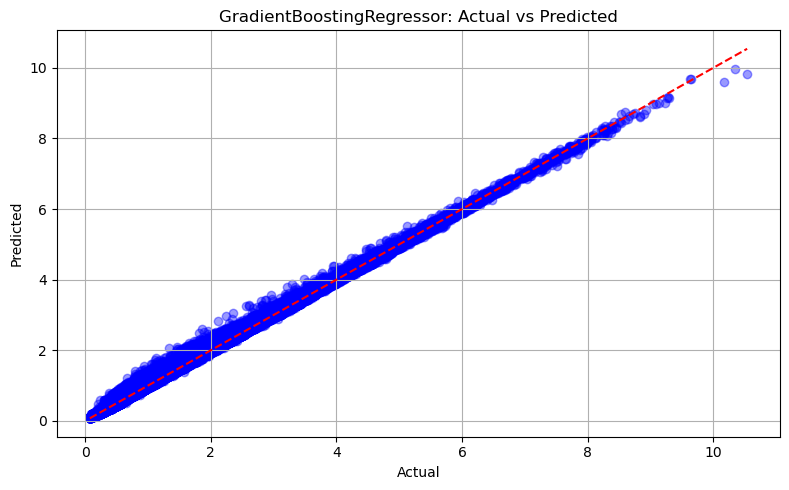

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GradientBoostingRegressor: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Build and Train in the neural Network**

In [82]:
#Import Important libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

##### Define the model

In [84]:
# Define the model
modelnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  
])

##### Compile the Model

In [86]:
#Compiling the model
modelnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

##### Train the model 

In [88]:
#Train the model and store the history 
history = modelnn.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.1)

Epoch 1/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 62s 1ms/step - loss: 0.0080 - mae: 0.0378 - val_loss: 9.9967e-04 - val_mae: 0.0192
Epoch 2/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - loss: 0.0010 - mae: 0.0204 - val_loss: 9.6913e-04 - val_mae: 0.0190
Epoch 3/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - loss: 9.9043e-04 - mae: 0.0198 - val_loss: 9.3291e-04 - val_mae: 0.0191
Epoch 4/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 9.5513e-04 - mae: 0.0194 - val_loss: 9.5429e-04 - val_mae: 0.0193
Epoch 5/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 64s 1ms/step - loss: 9.3584e-04 - mae: 0.0192 - val_loss: 9.0989e-04 - val_mae: 0.0189
Epoch 6/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 63s 1ms/step - loss: 9.1512e-04 - mae: 0.0190 - val_loss: 9.2646e-04 - val_mae: 0.0190
Epoch 7/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 8.9972e-04 - mae: 0.0187 - val_loss: 9.2392e-04 - val_mae: 0.0193
Epoch 8/30
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 65s 1ms/step - loss: 8.9149e-04 - mae: 0.0187 -

##### Evaluate the Model

In [90]:
#Evaluate the model 
test_loss,test_mae = modelnn.evaluate(X_test,y_test,verbose=1)
print('Test Loss : ',test_loss)
print('Test MAE:',test_mae)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 11s 850us/step - loss: 9.1442e-04 - mae: 0.0180
Test Loss :  0.0009118534508161247
Test MAE: 0.017970943823456764


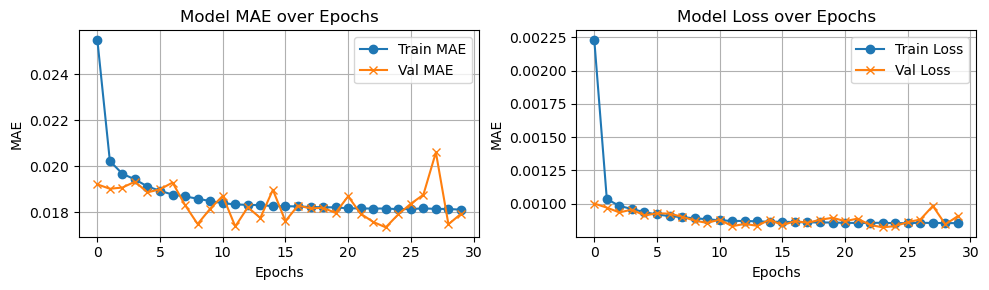

In [94]:
#Plotting the performance
plt.figure(figsize = (10,3))

#MAE Plot 
plt.subplot(1,2,1)
plt.plot(history.history['mae'],label='Train MAE',marker='o')
plt.plot(history.history['val_mae'],label='Val MAE',marker='x')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

#Loss Plot 
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss',marker='o')
plt.plot(history.history['val_loss'],label='Val Loss',marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### From the Over graphs , we can see MAE is overfitted and Loss is in the line

##### Lets Try dropout to avoid the overfitting 

In [109]:
#Lets Try dropout to avoid the overfitting 
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1) 
])

In [111]:
#Compiling the model
modelnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [119]:
#Train the model and store the history 
history = modelnn.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 8.4668e-04 - mae: 0.0181 - val_loss: 8.3560e-04 - val_mae: 0.0177
Epoch 2/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 8.4604e-04 - mae: 0.0181 - val_loss: 8.5559e-04 - val_mae: 0.0178
Epoch 3/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 8.3184e-04 - mae: 0.0180 - val_loss: 8.9358e-04 - val_mae: 0.0186
Epoch 4/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 89s 2ms/step - loss: 8.4410e-04 - mae: 0.0180 - val_loss: 8.5005e-04 - val_mae: 0.0176
Epoch 5/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - loss: 8.3900e-04 - mae: 0.0180 - val_loss: 8.2003e-04 - val_mae: 0.0175
Epoch 6/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - loss: 8.3504e-04 - mae: 0.0180 - val_loss: 8.5957e-04 - val_mae: 0.0186
Epoch 7/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 95s 2ms/step - loss: 8.3918e-04 - mae: 0.0180 - val_loss: 8.2982e-04 - val_mae: 0.0174
Epoch 8/10
46109/46109 ━━━━━━━━━━━━━━━━━━━━ 90s 2ms/step - loss: 8.4408e-04 - mae: 

In [121]:
#Evaluate the model 
test_loss,test_mae = modelnn.evaluate(X_test,y_test,verbose=1)
print('Test Loss : ',test_loss)
print('Test MAE:',test_mae)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 12s 959us/step - loss: 8.1782e-04 - mae: 0.0171
Test Loss :  0.0008120298734866083
Test MAE: 0.017138056457042694


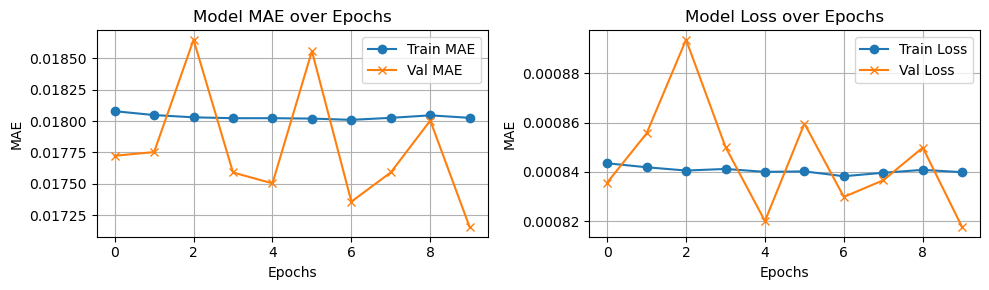

In [123]:
#Plotting the performance
plt.figure(figsize = (10,3))

#MAE Plot 
plt.subplot(1,2,1)
plt.plot(history.history['mae'],label='Train MAE',marker='o')
plt.plot(history.history['val_mae'],label='Val MAE',marker='x')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

#Loss Plot 
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss',marker='o')
plt.plot(history.history['val_loss'],label='Val Loss',marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [129]:
# EarlyStopping callback 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [131]:
history = modelnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 56s 1ms/step - loss: 8.2945e-04 - mae: 0.0180 - val_loss: 8.3502e-04 - val_mae: 0.0183
Epoch 2/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 8.3442e-04 - mae: 0.0180 - val_loss: 8.0840e-04 - val_mae: 0.0177
Epoch 3/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - loss: 8.4443e-04 - mae: 0.0180 - val_loss: 8.4109e-04 - val_mae: 0.0186
Epoch 4/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - loss: 8.3895e-04 - mae: 0.0180 - val_loss: 7.9887e-04 - val_mae: 0.0172
Epoch 5/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 8.4517e-04 - mae: 0.0180 - val_loss: 7.9959e-04 - val_mae: 0.0175
Epoch 6/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 8.3515e-04 - mae: 0.0180 - val_loss: 0.0010 - val_mae: 0.0213
Epoch 7/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 8.4026e-04 - mae: 0.0180 - val_loss: 8.4141e-04 - val_mae: 0.0183
Epoch 8/100
40986/40986 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 8.4440e-04 - m

In [133]:
#Evaluate the model 
test_loss,test_mae = modelnn.evaluate(X_test,y_test,verbose=1)
print('Test Loss : ',test_loss)
print('Test MAE:',test_mae)

12808/12808 ━━━━━━━━━━━━━━━━━━━━ 10s 812us/step - loss: 8.2131e-04 - mae: 0.0174
Test Loss :  0.0008170287474058568
Test MAE: 0.017333250492811203


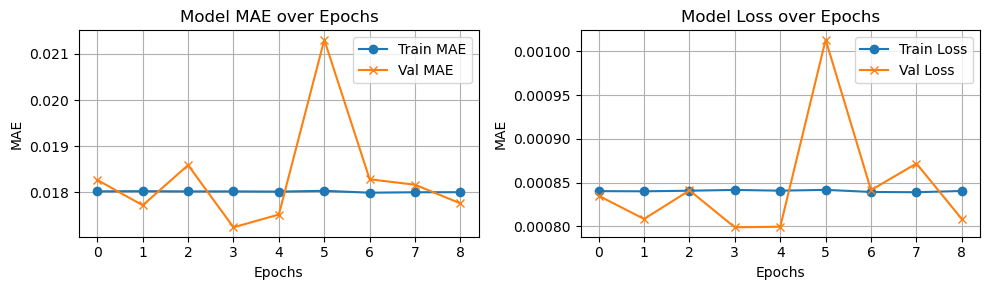

In [135]:
#Plotting the performance
plt.figure(figsize = (10,3))

#MAE Plot 
plt.subplot(1,2,1)
plt.plot(history.history['mae'],label='Train MAE',marker='o')
plt.plot(history.history['val_mae'],label='Val MAE',marker='x')
plt.title('Model MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

#Loss Plot 
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss',marker='o')
plt.plot(history.history['val_loss'],label='Val Loss',marker='x')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()